In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")

print("Path to dataset files:", path)

100%|██████████| 25.7M/25.7M [00:02<00:00, 12.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/versions/1


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Task 1

This task was about  basic preprocessing steps, including tokenization, stopword removal, and lemmatization, and apply word embeddings for representing text data.


Here I have imported all my libraries

In [26]:
import re
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import gensim
from gensim.models import Word2Vec, FastText
import gensim.downloader as api
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


For my (удобства) group all classes and functions that I have created

In [32]:
class AruCBOW:
    def __init__(self, sentences, vector_size=100, window=5, min_count=1, epochs=5):
        self.model = Word2Vec(sentences, vector_size=vector_size, window=window, min_count=min_count, sg=0, epochs=epochs)
class AruSkipGram:
    def __init__(self, sentences, vector_size=100, window=5, min_count=1, epochs=5):
        self.model = Word2Vec(sentences, vector_size=vector_size, window=window, min_count=min_count, sg=1, epochs=epochs)
class AruFastText:
    def __init__(self, sentences, vector_size=100, window=5, min_count=1, epochs=5):
        self.model = FastText(sentences, vector_size=vector_size, window=window, min_count=min_count, epochs=epochs)


In [35]:
def preprocess(text):
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t.isalpha() and t not in stop_words]
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return tokens
def cosine_sim(model, word1, word2):
    return model.wv.similarity(word1, word2) if word1 in model.wv.key_to_index and word2 in model.wv.key_to_index else None


In [27]:
df = pd.read_csv("/content/sample_data/IMDB Dataset.csv")
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [28]:
df['clean'] = df['review'].apply(lambda x: re.sub(r'<.*?>', '', x).lower())

In [33]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
df['tokens'] = df['clean'].apply(preprocess)
sentences = df['tokens'].tolist()

Model creation

In [34]:
cbow_model = AruCBOW(sentences).model
sg_model = AruSkipGram(sentences).model
fasttext_model = AruFastText(sentences).model
glove_model = api.load("glove-wiki-gigaword-100")

[==================================================] 100.0% 128.1/128.1MB downloaded


In [36]:
sim_cbow = cosine_sim(cbow_model, "good", "bad")
sim_sg = cosine_sim(sg_model, "good", "bad")
sim_fasttext = cosine_sim(fasttext_model, "good", "bad")
sim_glove = glove_model.similarity("good", "bad") if "good" in glove_model.key_to_index and "bad" in glove_model.key_to_index else None
print("CBOW:", sim_cbow, "SkipGram:", sim_sg, "FastText:", sim_fasttext, "GloVe:", sim_glove)
words_subset = list({w for sentence in sentences for w in sentence})
words_subset = words_subset[:200]
embeddings = []
labels = []
for w in words_subset:
    if w in cbow_model.wv:
        embeddings.append(cbow_model.wv[w])
        labels.append(w)
embeddings = np.array(embeddings)
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings)

CBOW: 0.6996787 SkipGram: 0.8118457 FastText: 0.6715543 GloVe: 0.77027977


I have done vizualization in diffirent window

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


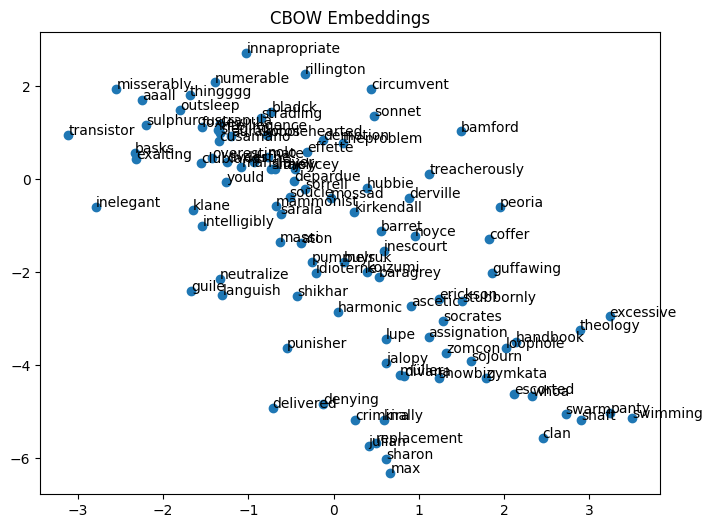

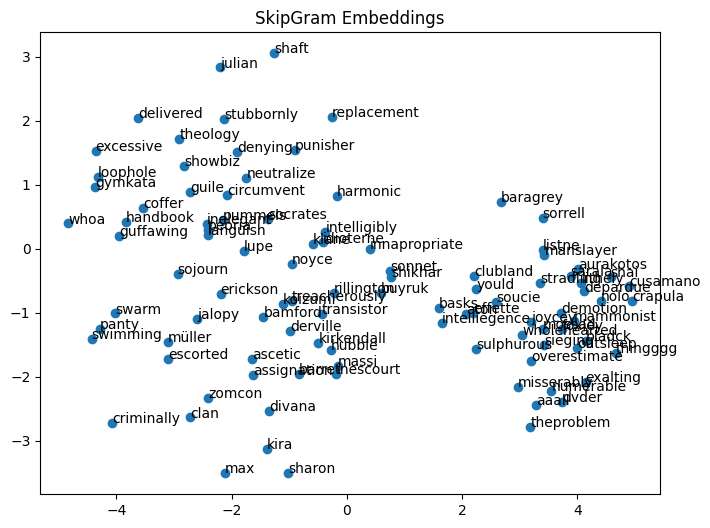

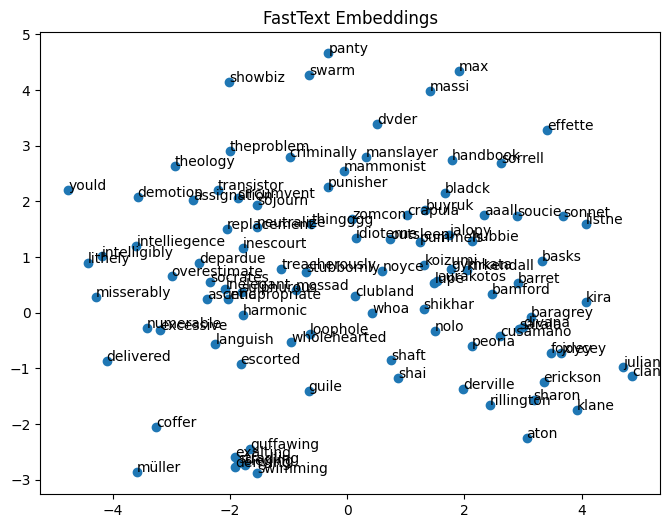

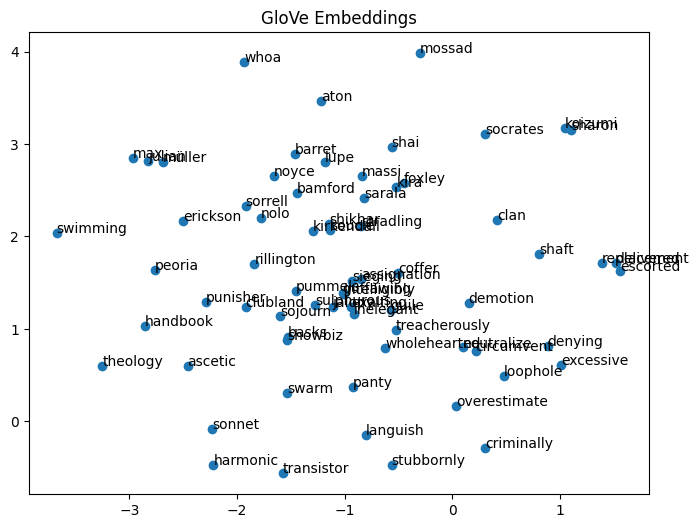

In [39]:
import re, pandas as pd, numpy as np, nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import gensim
from gensim.models import Word2Vec, FastText
import gensim.downloader as api
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

df = pd.read_csv("/content/sample_data/IMDB Dataset.csv")
df['clean'] = df['review'].apply(lambda x: re.sub(r'<.*?>', '', x).lower())
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
def preprocess(text):
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t.isalpha() and t not in stop_words]
    return [lemmatizer.lemmatize(t) for t in tokens]
df['tokens'] = df['clean'].apply(preprocess)
sentences = df['tokens'].tolist()

cbow_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=0, epochs=5)
sg_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=1, epochs=5)
fasttext_model = FastText(sentences, vector_size=100, window=5, min_count=1, epochs=5)
glove_model = api.load("glove-wiki-gigaword-100")

def plot_embeddings(model, title, glove=False):
    words_subset = list({w for sent in sentences for w in sent})[:100]
    vecs, labs = [], []
    for w in words_subset:
        if glove:
            if w in model.key_to_index:
                vecs.append(model[w])
                labs.append(w)
        else:
            if w in model.wv.key_to_index:
                vecs.append(model.wv[w])
                labs.append(w)
    vecs = np.array(vecs)
    tsne = TSNE(n_components=2, random_state=42)
    vecs_2d = tsne.fit_transform(vecs)
    plt.figure(figsize=(8,6))
    plt.scatter(vecs_2d[:,0], vecs_2d[:,1])
    for i, lab in enumerate(labs):
        plt.annotate(lab, (vecs_2d[i,0], vecs_2d[i,1]))
    plt.title(title)
    plt.show()

plot_embeddings(cbow_model, "CBOW Embeddings")
plot_embeddings(sg_model, "SkipGram Embeddings")
plot_embeddings(fasttext_model, "FastText Embeddings")
plot_embeddings(glove_model, "GloVe Embeddings", glove=True)


Task 2

In [8]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [12]:
class CringeDataSet(Dataset):
    def __init__(self, df):
        self.sequences = df['sequence'].tolist()
        self.labels = df['label'].tolist()

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        seq = torch.tensor(self.sequences[idx], dtype=torch.long)
        label = torch.tensor(self.labels[idx], dtype=torch.long)
        return seq, label


class JustRNN(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, output_dim, num_layers=1):
        super(JustRNN, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=word_to_idx["<PAD>"])
        self.rnn = nn.RNN(embed_dim, hidden_dim, num_layers, batch_first=True, nonlinearity='tanh')
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        embed = self.embedding(x)
        out, hidden = self.rnn(embed)
        out = self.fc(hidden[-1])
        return out

def clean_text(text):
    text = re.sub(r'<.*?>', '', text)
    return text.lower()

def text_to_sequence(text, word_to_idx, max_len=200):
    tokens = word_tokenize(text)
    seq = [word_to_idx.get(token, word_to_idx["<UNK>"]) for token in tokens]
    if len(seq) < max_len:
        seq = seq + [word_to_idx["<PAD>"]] * (max_len - len(seq))
    else:
        seq = seq[:max_len]
    return seq

Import dataset

In [13]:
df = pd.read_csv("/content/sample_data/IMDB_Dataset.csv")
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [14]:
df['clean_review'] = df['review'].apply(clean_text)
all_tokens = []
for review in df['clean_review']:
    tokens = word_tokenize(review)
    all_tokens.extend(tokens)

word_counts = Counter(all_tokens)
vocab = [word for word, count in word_counts.items() if count >= 1]

word_to_idx = {"<PAD>": 0, "<UNK>": 1}
for i, word in enumerate(vocab, start=2):
    word_to_idx[word] = i
print("Vocab size:", len(word_to_idx))

df['sequence'] = df['clean_review'].apply(lambda x: text_to_sequence(x, word_to_idx, max_len=200))
df['label'] = df['sentiment'].apply(lambda x: 1 if x.strip().lower()=='positive' else 0)

Vocab size: 201908


In [15]:
dataset = CringeDataSet(df)
batch_size = 32
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
vocab_size = len(word_to_idx)
embed_dim = 100
hidden_dim = 128
output_dim = 2

model = JustRNN(vocab_size, embed_dim, hidden_dim, output_dim)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
num_epochs = 50
all_train_losses = []
all_train_acc = []
grad_norms = []
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    correct = 0
    total = 0

    for batch_idx, (inputs, labels) in enumerate(dataloader):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        rnn_grad = model.rnn.weight_hh_l0.grad
        if rnn_grad is not None:
            grad_norms.append(rnn_grad.norm().item())

    avg_loss = epoch_loss / len(dataloader)
    accuracy = correct / total
    all_train_losses.append(avg_loss)
    all_train_acc.append(accuracy)
    print(f"Epoch {epoch+1}/{num_epochs} - Loss: {avg_loss:.4f}, Accuracy: {accuracy:.4f}")

Epoch 1/50 - Loss: 0.6960, Accuracy: 0.5036
Epoch 2/50 - Loss: 0.6942, Accuracy: 0.5175
Epoch 3/50 - Loss: 0.6871, Accuracy: 0.5408
Epoch 4/50 - Loss: 0.6720, Accuracy: 0.5678
Epoch 5/50 - Loss: 0.6325, Accuracy: 0.6429
Epoch 6/50 - Loss: 0.5861, Accuracy: 0.7052
Epoch 7/50 - Loss: 0.6323, Accuracy: 0.6322
Epoch 8/50 - Loss: 0.6164, Accuracy: 0.6487
Epoch 9/50 - Loss: 0.5691, Accuracy: 0.7020
Epoch 10/50 - Loss: 0.5972, Accuracy: 0.6616
Epoch 11/50 - Loss: 0.5607, Accuracy: 0.7072
Epoch 12/50 - Loss: 0.6052, Accuracy: 0.6377
Epoch 13/50 - Loss: 0.5793, Accuracy: 0.6859
Epoch 14/50 - Loss: 0.5975, Accuracy: 0.6333
Epoch 15/50 - Loss: 0.5985, Accuracy: 0.6456
Epoch 16/50 - Loss: 0.6471, Accuracy: 0.5964
Epoch 17/50 - Loss: 0.6306, Accuracy: 0.6121
Epoch 18/50 - Loss: 0.5782, Accuracy: 0.6991
Epoch 19/50 - Loss: 0.5518, Accuracy: 0.7093
Epoch 20/50 - Loss: 0.5184, Accuracy: 0.7417
Epoch 21/50 - Loss: 0.5630, Accuracy: 0.6531
Epoch 22/50 - Loss: 0.5060, Accuracy: 0.7662
Epoch 23/50 - Loss:

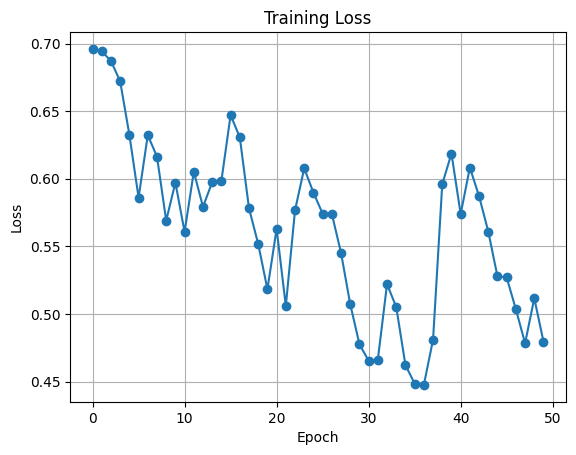

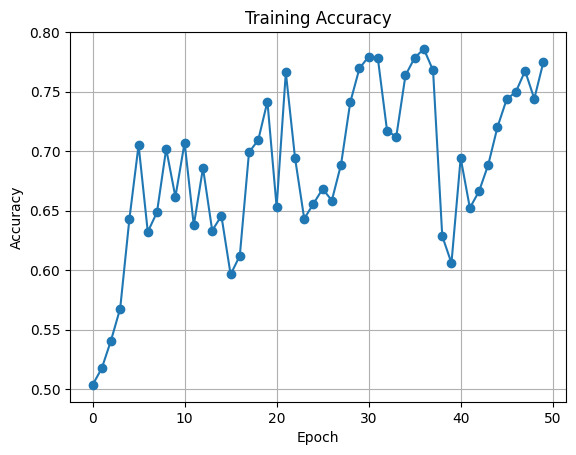

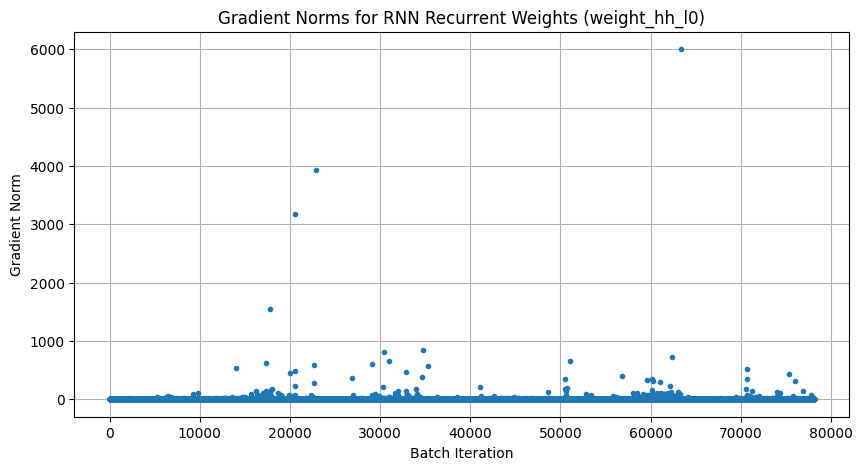

In [16]:
plt.figure()
plt.plot(all_train_losses, marker='o')
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

plt.figure()
plt.plot(all_train_acc, marker='o')
plt.title("Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

plt.figure(figsize=(10,5))
plt.plot(grad_norms, marker='.', linestyle='none')
plt.title("Gradient Norms for RNN Recurrent Weights (weight_hh_l0)")
plt.xlabel("Batch Iteration")
plt.ylabel("Gradient Norm")
plt.grid(True)
plt.show()

Task 3

In [14]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import time
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [2]:
def clean_text(txt):
    return re.sub(r'<.*?>', '', txt).lower()

def train_model(model, train_loader, val_loader, criterion, optimizer, epochs, device):
    model.to(device)
    train_losses, train_accs, val_losses, val_accs = [], [], [], []
    for _ in range(epochs):
        model.train()
        r_loss, r_correct, tot = 0.0, 0, 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            r_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            r_correct += (preds == labels).sum().item()
            tot += labels.size(0)
        train_losses.append(r_loss / tot)
        train_accs.append(r_correct / tot)
        model.eval()
        vr_loss, vr_correct, vtot = 0.0, 0, 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                vr_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)
                vr_correct += (preds == labels).sum().item()
                vtot += labels.size(0)
        val_losses.append(vr_loss / vtot)
        val_accs.append(vr_correct / vtot)
    return train_losses, train_accs, val_losses, val_accs

In [3]:
class CringeReviewDataset(Dataset):
    def __init__(self, df):
        self.seqs = df['sequence'].tolist()
        self.labels = df['label'].tolist()
    def __len__(self):
        return len(self.labels)
    def __getitem__(self, idx):
        return torch.tensor(self.seqs[idx], dtype=torch.long), torch.tensor(self.labels[idx], dtype=torch.long)

class FunkyLSTM(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, output_dim, num_layers=1):
        super(FunkyLSTM, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=word_to_idx["<PAD>"])
        self.lstm = nn.LSTM(embed_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
    def forward(self, x):
        x = self.embedding(x)
        out, (hn, _) = self.lstm(x)
        return self.fc(hn[-1])

class RadicalGRU(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, output_dim, num_layers=1):
        super(RadicalGRU, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=word_to_idx["<PAD>"])
        self.gru = nn.GRU(embed_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
    def forward(self, x):
        x = self.embedding(x)
        out, hn = self.gru(x)
        return self.fc(hn[-1])

In [9]:
df = pd.read_csv("/content/sample_data/IMDB Dataset.csv")
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [10]:
df['clean_review'] = df['review'].apply(clean_text)
df['label'] = df['sentiment'].apply(lambda x: 1 if x.strip().lower()=='positive' else 0)

In [15]:
all_tokens = []
for rev in df['clean_review']:
    toks = word_tokenize(rev)
    all_tokens.extend(toks)
from collections import Counter
word_counts = Counter(all_tokens)
vocab = [w for w, c in word_counts.items() if c >= 1]
word_to_idx = {"<PAD>": 0, "<UNK>": 1}
for i, w in enumerate(vocab, start=2):
    word_to_idx[w] = i
def text_to_sequence(txt, max_len=200):
    toks = word_tokenize(txt)
    seq = [word_to_idx.get(token, word_to_idx["<UNK>"]) for token in toks]
    return seq + [word_to_idx["<PAD>"]] * (max_len - len(seq)) if len(seq) < max_len else seq[:max_len]
df['sequence'] = df['clean_review'].apply(lambda x: text_to_sequence(x, max_len=200))

In [16]:
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

In [17]:
train_dataset = CringeReviewDataset(train_df)
val_dataset = CringeReviewDataset(val_df)
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [18]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vocab_size = len(word_to_idx)
embed_dim = 100
hidden_dim = 128
output_dim = 2
epochs = 5
lstm_model = FunkyLSTM(vocab_size, embed_dim, hidden_dim, output_dim)
criterion = nn.CrossEntropyLoss()
optimizer_lstm = optim.Adam(lstm_model.parameters(), lr=0.001)
start_time = time.time()
lstm_train_losses, lstm_train_accs, lstm_val_losses, lstm_val_accs = train_model(lstm_model, train_loader, val_loader, criterion, optimizer_lstm, epochs, device)
lstm_time = time.time() - start_time


In [19]:
gru_model = RadicalGRU(vocab_size, embed_dim, hidden_dim, output_dim)
optimizer_gru = optim.Adam(gru_model.parameters(), lr=0.001)
start_time = time.time()
gru_train_losses, gru_train_accs, gru_val_losses, gru_val_accs = train_model(gru_model, train_loader, val_loader, criterion, optimizer_gru, epochs, device)
gru_time = time.time() - start_time

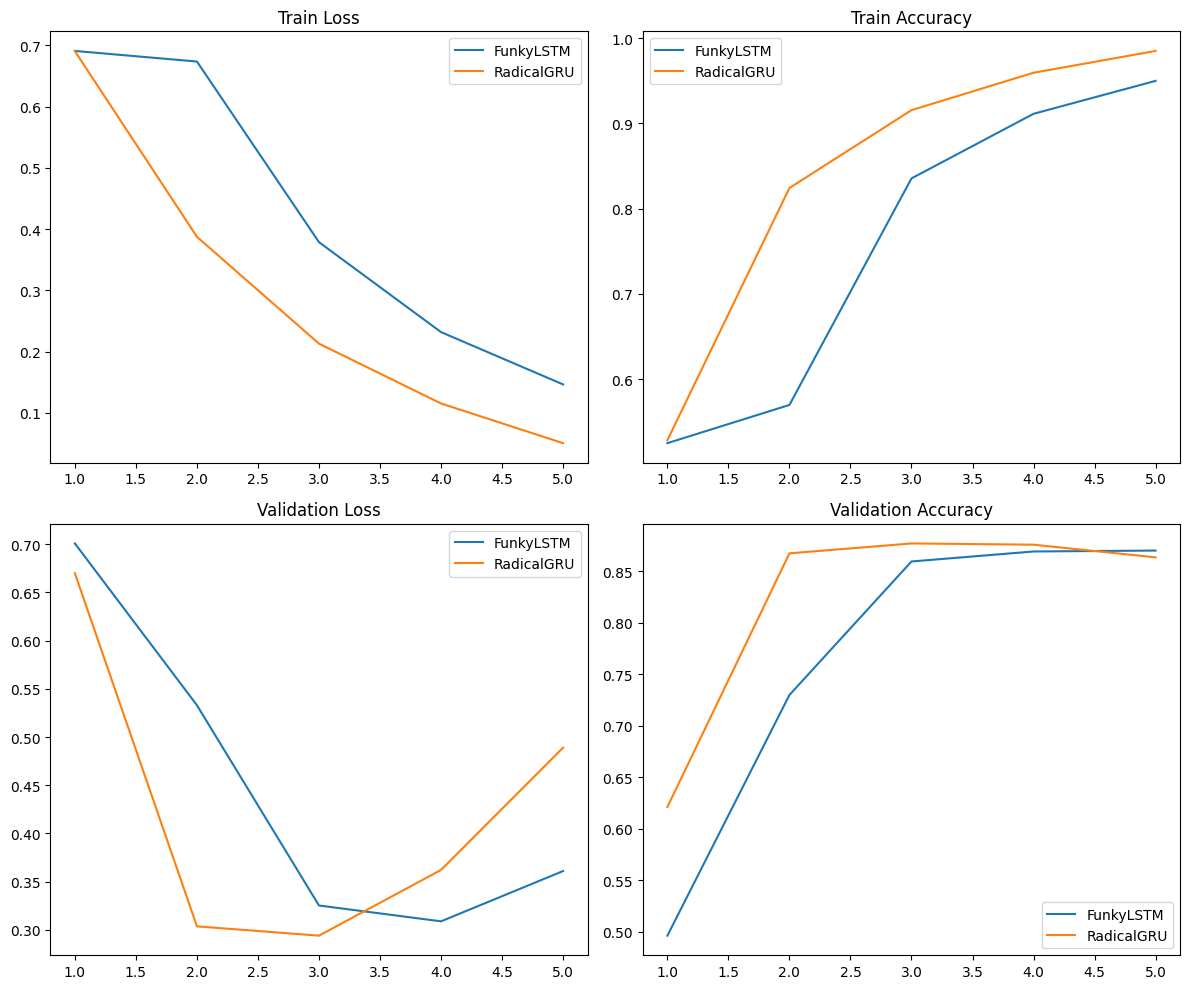

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs[0,0].plot(range(1, epochs+1), lstm_train_losses, label='FunkyLSTM')
axs[0,0].plot(range(1, epochs+1), gru_train_losses, label='RadicalGRU')
axs[0,0].set_title("Train Loss")
axs[0,0].legend()
axs[0,1].plot(range(1, epochs+1), lstm_train_accs, label='FunkyLSTM')
axs[0,1].plot(range(1, epochs+1), gru_train_accs, label='RadicalGRU')
axs[0,1].set_title("Train Accuracy")
axs[0,1].legend()
axs[1,0].plot(range(1, epochs+1), lstm_val_losses, label='FunkyLSTM')
axs[1,0].plot(range(1, epochs+1), gru_val_losses, label='RadicalGRU')
axs[1,0].set_title("Validation Loss")
axs[1,0].legend()
axs[1,1].plot(range(1, epochs+1), lstm_val_accs, label='FunkyLSTM')
axs[1,1].plot(range(1, epochs+1), gru_val_accs, label='RadicalGRU')
axs[1,1].set_title("Validation Accuracy")
axs[1,1].legend()
plt.tight_layout()
plt.show()

In [21]:
print("FunkyLSTM - Val Accuracy: {:.4f}, Time: {:.2f} sec".format(lstm_val_accs[-1], lstm_time))
print("RadicalGRU - Val Accuracy: {:.4f}, Time: {:.2f} sec".format(gru_val_accs[-1], gru_time))

FunkyLSTM - Val Accuracy: 0.8700, Time: 71.65 sec
RadicalGRU - Val Accuracy: 0.8634, Time: 65.49 sec


Task 4

In [22]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kewagbln/shakespeareonline")

print("Path to dataset files:", path)

100%|██████████| 1.97M/1.97M [00:00<00:00, 3.31MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/kewagbln/shakespeareonline/versions/1


In [1]:
import re
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [2]:
class FunkyTextDataset(Dataset):
    def __init__(self, inputs, targets):
        self.inputs = inputs
        self.targets = targets
    def __len__(self):
        return len(self.targets)
    def __getitem__(self, idx):
        return torch.tensor(self.inputs[idx], dtype=torch.long), torch.tensor(self.targets[idx], dtype=torch.long)

class WackyLSTM(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size, num_layers):
        super(WackyLSTM, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.lstm = nn.LSTM(embed_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, vocab_size)
    def forward(self, x, hidden):
        x = self.embedding(x)
        out, hidden = self.lstm(x, hidden)
        out = out[:, -1, :]
        out = self.fc(out)
        return out, hidden
    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        return (weight.new_zeros(1, batch_size, hidden_size),
                weight.new_zeros(1, batch_size, hidden_size))

In [3]:
def generate_text(model, seed_text, next_words=50):
    model.eval()
    tokens_seed = word_tokenize(seed_text.lower())
    state_h, state_c = model.init_hidden(1)
    current_seq = [word2idx.get(w, 0) for w in tokens_seed]
    for _ in range(next_words):
        inp = torch.tensor(current_seq[-seq_length:], dtype=torch.long).unsqueeze(0).to(device)
        output, (state_h, state_c) = model(inp, (state_h, state_c))
        prob = nn.functional.softmax(output, dim=1).data
        word_idx = torch.multinomial(prob, num_samples=1).item()
        current_seq.append(word_idx)
    return " ".join([idx2word[idx] for idx in current_seq])

In [4]:
with open("/content/sample_data/t8.shakespeare.txt", "r", encoding="utf-8") as f:
    text = f.read()
text = text.lower()
tokens = word_tokenize(text)

In [5]:
words = sorted(list(set(tokens)))
word2idx = {w: i for i, w in enumerate(words)}
idx2word = {i: w for w, i in word2idx.items()}
vocab_size = len(words)

In [6]:
seq_length = 20
inputs = []
targets = []
for i in range(len(tokens) - seq_length):
    inputs.append([word2idx[w] for w in tokens[i:i+seq_length]])
    targets.append(word2idx[tokens[i+seq_length]])
inputs = np.array(inputs)
targets = np.array(targets)

In [7]:
dataset = FunkyTextDataset(inputs, targets)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

embed_size = 128
hidden_size = 256
num_layers = 1
model = WackyLSTM(vocab_size, embed_size, hidden_size, num_layers)

In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs =
for epoch in range(num_epochs):
    total_loss = 0
    for batch_inputs, batch_targets in dataloader:
        hidden = model.init_hidden(batch_inputs.size(0))
        optimizer.zero_grad()
        output, hidden = model(batch_inputs.to(device), hidden)
        loss = criterion(output, batch_targets.to(device))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print("Epoch:", epoch+1, "Loss:", total_loss/len(dataloader))


Epoch: 1 Loss: 5.315010085452579
Epoch: 2 Loss: 4.850646189964502
Epoch: 3 Loss: 4.6565445280355435
Epoch: 4 Loss: 4.509132569324695
Epoch: 5 Loss: 4.391380342125407
Epoch: 6 Loss: 4.2867488245223235
Epoch: 7 Loss: 4.185708695423652
Epoch: 8 Loss: 4.103195425289781
Epoch: 9 Loss: 4.041071122302452
Epoch: 10 Loss: 3.9769602156046666
Epoch: 11 Loss: 3.929265276291747
Epoch: 12 Loss: 3.8873697486952494
Epoch: 13 Loss: 3.8523962637220017
Epoch: 14 Loss: 3.815344412016254
Epoch: 15 Loss: 3.780403278077258


In [9]:
seed = "to be or not to be"
generated = generate_text(model, seed, next_words=50)
print(generated)

to be or not to be just . if i hear music be that hope they eat alive . thou hast been the heir of thy royal hand ; richmond , my sovereign . king henry . then am virtuous 's victory at my brother 's king , thou wast that my husband had . gloucester


Task 5

In [10]:
import re
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [11]:
def clean_text(txt):
    return re.sub(r'<.*?>', '', txt).lower()

def text_to_sequence(txt):
    tokens = word_tokenize(txt)
    seq = [word_to_idx.get(t, word_to_idx["<UNK>"]) for t in tokens]
    if len(seq) < max_len:
        seq += [word_to_idx["<PAD>"]] * (max_len - len(seq))
    else:
        seq = seq[:max_len]
    return seq

def train_model(model, train_loader, val_loader, criterion, optimizer, device, epochs=5):
    model.to(device)
    train_losses, val_losses, train_accs, val_accs = [], [], [], []
    for epoch in range(epochs):
        model.train()
        running_loss, correct, total = 0, 0, 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
        train_loss = running_loss / total
        train_acc = correct / total
        model.eval()
        running_loss, correct, total = 0, 0, 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                running_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)
                correct += (preds == labels).sum().item()
                total += labels.size(0)
        val_loss = running_loss / total
        val_acc = correct / total
        train_losses.append(train_loss)
        train_accs.append(train_acc)
        val_losses.append(val_loss)
        val_accs.append(val_acc)
        print("Epoch:", epoch+1, "Train Loss:", train_loss, "Train Acc:", train_acc, "Val Loss:", val_loss, "Val Acc:", val_acc)
    return train_losses, train_accs, val_losses, val_accs

In [12]:
class FunkyReviewDataset(Dataset):
    def __init__(self, df):
        self.sequences = df['sequence'].tolist()
        self.labels = df['label'].tolist()
    def __len__(self):
        return len(self.labels)
    def __getitem__(self, idx):
        return torch.tensor(self.sequences[idx], dtype=torch.long), torch.tensor(self.labels[idx], dtype=torch.long)

class CringeLSTM(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, output_dim, num_layers=1):
        super(CringeLSTM, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=word_to_idx["<PAD>"])
        self.lstm = nn.LSTM(embed_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
    def forward(self, x):
        x = self.embedding(x)
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out

class SillyBiLSTM(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, output_dim, num_layers=1):
        super(SillyBiLSTM, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=word_to_idx["<PAD>"])
        self.lstm = nn.LSTM(embed_dim, hidden_dim, num_layers, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_dim * 2, output_dim)
    def forward(self, x):
        x = self.embedding(x)
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out

In [14]:
df = pd.read_csv("/content/sample_data/IMDB Dataset.csv")
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [15]:
df['clean_review'] = df['review'].apply(clean_text)
df['label'] = df['sentiment'].apply(lambda x: 1 if x.strip().lower()=='positive' else 0)


In [16]:
all_tokens = []
for rev in df['clean_review']:
    all_tokens.extend(word_tokenize(rev))
from collections import Counter
word_counts = Counter(all_tokens)
vocab = [w for w, c in word_counts.items() if c >= 1]
word_to_idx = {"<PAD>":0, "<UNK>":1}
for i, word in enumerate(vocab, start=2):
    word_to_idx[word] = i
max_len = 200

In [17]:
df['sequence'] = df['clean_review'].apply(text_to_sequence)

In [18]:
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

In [19]:
train_dataset = FunkyReviewDataset(train_df)
val_dataset = FunkyReviewDataset(val_df)
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [23]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vocab_size = len(word_to_idx)
embed_dim = 100
hidden_dim = 128
output_dim = 2
epochs = 50
criterion = nn.CrossEntropyLoss()

In [24]:
model_lstm = CringeLSTM(vocab_size, embed_dim, hidden_dim, output_dim)
optimizer_lstm = optim.Adam(model_lstm.parameters(), lr=0.001)
print("CringeLSTM")
train_losses_lstm, train_accs_lstm, val_losses_lstm, val_accs_lstm = train_model(model_lstm, train_loader, val_loader, criterion, optimizer_lstm, device, epochs)

model_bilstm = SillyBiLSTM(vocab_size, embed_dim, hidden_dim, output_dim)
optimizer_bilstm = optim.Adam(model_bilstm.parameters(), lr=0.001)
print("SillyBiLSTM")
train_losses_bilstm, train_accs_bilstm, val_losses_bilstm, val_accs_bilstm = train_model(model_bilstm, train_loader, val_loader, criterion, optimizer_bilstm, device, epochs)


CringeLSTM
Epoch: 1 Train Loss: 0.6893558981418609 Train Acc: 0.5277 Val Loss: 0.6908302574157715 Val Acc: 0.5225
Epoch: 2 Train Loss: 0.6673480292320252 Train Acc: 0.582325 Val Loss: 0.6405200424671174 Val Acc: 0.6744
Epoch: 3 Train Loss: 0.6438789375305176 Train Acc: 0.624175 Val Loss: 0.6782048107147217 Val Acc: 0.5493
Epoch: 4 Train Loss: 0.6277652785539627 Train Acc: 0.634025 Val Loss: 0.6392497985839843 Val Acc: 0.6593
Epoch: 5 Train Loss: 0.36557787821292875 Train Acc: 0.844125 Val Loss: 0.34797369906902315 Val Acc: 0.8482
Epoch: 6 Train Loss: 0.21709517695009709 Train Acc: 0.917675 Val Loss: 0.3263966474294662 Val Acc: 0.8625
Epoch: 7 Train Loss: 0.13398721138313413 Train Acc: 0.95385 Val Loss: 0.3865514862120151 Val Acc: 0.8646
Epoch: 8 Train Loss: 0.07388994119092822 Train Acc: 0.977425 Val Loss: 0.413603128516674 Val Acc: 0.8549
Epoch: 9 Train Loss: 0.038125183026771994 Train Acc: 0.98985 Val Loss: 0.530989680878818 Val Acc: 0.8572
Epoch: 10 Train Loss: 0.024498396628373303 

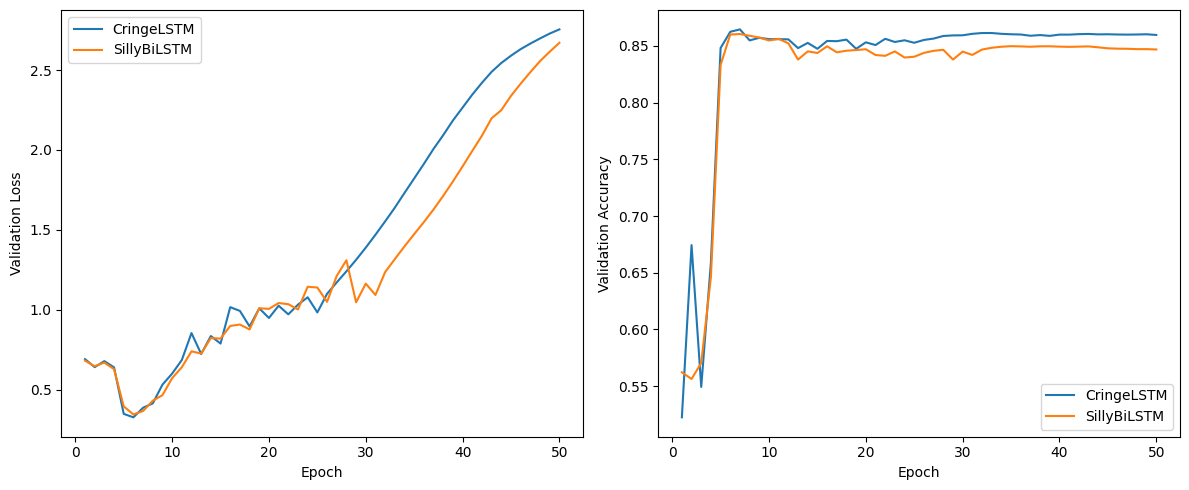

In [25]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(range(1, epochs+1), val_losses_lstm, label="CringeLSTM")
plt.plot(range(1, epochs+1), val_losses_bilstm, label="SillyBiLSTM")
plt.xlabel("Epoch")
plt.ylabel("Validation Loss")
plt.legend()
plt.subplot(1,2,2)
plt.plot(range(1, epochs+1), val_accs_lstm, label="CringeLSTM")
plt.plot(range(1, epochs+1), val_accs_bilstm, label="SillyBiLSTM")
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.tight_layout()
plt.show()
